# Removing Noise from a Binary Mask

In [2]:
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import binary_fill_holes
from skimage import morphology

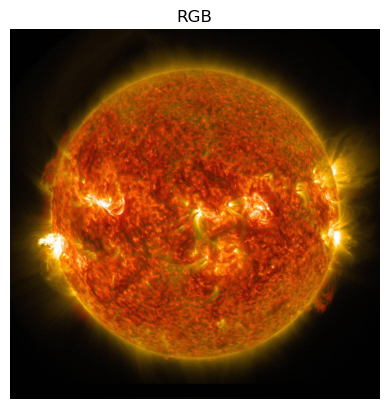

In [3]:
solar_flare = cv2.imread("./images/solarFlare.jpg")
solar_flare = cv2.cvtColor(solar_flare, cv2.COLOR_BGR2RGB)

plt.imshow(solar_flare)
plt.title('RGB')
plt.axis('off')
plt.show()

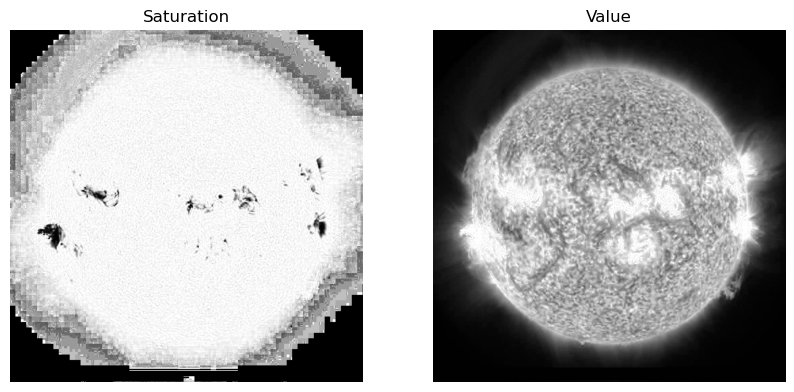

In [4]:
solar_flare_hsv = cv2.cvtColor(solar_flare, cv2.COLOR_RGB2HSV)
hue, saturation, value = cv2.split(solar_flare_hsv)

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(saturation, cmap='gray')
axs[0].set_title('Saturation')
axs[0].axis('off')
axs[1].imshow(value, cmap='gray')
axs[1].set_title('Value')
axs[1].axis('off')
plt.show()

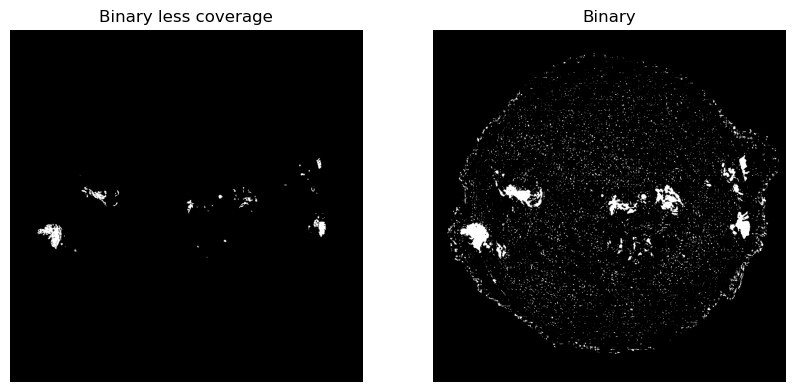

In [5]:
saturation = saturation / saturation.max()
value = value / value.max()
solar_flare_binary_less_coverage = (saturation < 0.5) & (value > 0.95)
solar_flare_binary = (saturation < 0.9) & (value > 0.25)

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(solar_flare_binary_less_coverage, cmap='gray')
axs[0].set_title('Binary less coverage')
axs[0].axis('off')
axs[1].imshow(solar_flare_binary, cmap='gray')
axs[1].set_title('Binary')
axs[1].axis('off')
plt.show()

Using a strict threshold creates a segmentation that misses some of the solar flares. By loosening the threshold, we can include more of the solar flares. The new threshold will also include more noise, but we can deal with that in post-processing.
To fill in holes in a segmentation, you we use the [binary_fill_holes()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.binary_fill_holes.html) function.

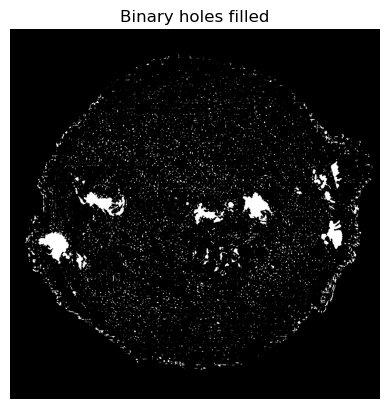

In [6]:
solar_flare_binary_fill = binary_fill_holes(solar_flare_binary)

plt.imshow(solar_flare_binary_fill, cmap='gray')
plt.title('Binary holes filled')
plt.axis('off')
plt.show()

The holes in the segmentation are filled, but there is still a lot of static noise. We can remove small areas of foreground (white regions) with [remove_small_objects()](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.remove_small_objects).
All areas of foreground made up of fewer than n pixels are removed.

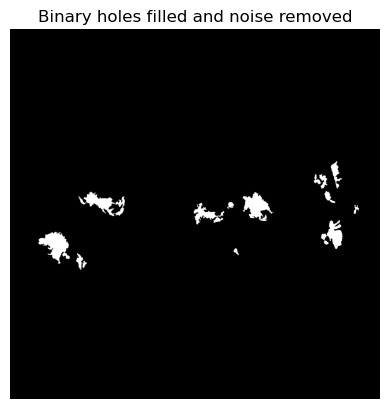

In [8]:
solar_flare_binary_fill_clean = morphology.remove_small_objects(solar_flare_binary_fill, 100)

plt.imshow(solar_flare_binary_fill_clean, cmap='gray')
plt.title('Binary holes filled and noise removed')
plt.axis('off')
plt.show()